## Реальный кейс с использованием t-тест для зависимых выборок

Я работаю Java-разработчиком в логистической компании в отделе, занимающемся приложениями для банков. Мне приходится решать самые различные проблемы, например, иногда приходится исправлять базу данных заказчиков, не видя её, или исследовать ситуации, когда нагрузка на БД очень большая, не имея к ней доступа.

В таких случаях, чаще всего приходится оптимизировать скрипты в коде. Я оптимизирую скрипт и специальными методами анализирую его нагрузку. Когда я вижу, что нагрузка достаточно маленькая, я отправляю её на проверку заказчику. 

Тестовые базы и базы прода отличаются тем, что в базе прода обычно огромное количество данных, и скрипт может там отработать по-другому. Поэтому в ответ на скрипт, инженеры поддержки банка отправляют мне ответ, помогло ли это базе на проде или нет.

Недавно я попробовала метод t-теста для зависимых выборок, чтобы объективно оценить эффективность оптимизации скриптов с помощью статистических методов. 

В этом примере я сгенерирую времена выполнения скриптов, чтобы не было проблем с импортированием данных.

**Рассмотрим его подробнее:**

Для начала импортируем нужные библиотеки

In [743]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata, norm

Генерация данных для выборок (время выполнения скрипта до оптимизации и время выполнения после)

In [744]:
sample1 = np.random.uniform(low=1, high=5, size=50)
sample2 = np.random.uniform(low=2, high=6, size=50)
print (sample1)
print (sample2)

[4.31007569 4.05811118 3.29411581 4.82418857 1.80189806 1.43705684
 4.41584787 2.75659927 4.38787542 4.57236082 1.24983037 4.53385905
 2.79327622 3.04172996 3.50637004 4.70553043 1.07646438 2.90737387
 3.75088817 3.89082783 3.77012973 1.53774052 2.19758235 2.4348621
 4.21774883 2.11503949 1.84281986 4.82979208 1.03545314 4.99128342
 3.7072852  4.3138772  2.17847759 1.05726111 3.95147807 4.33657839
 3.96190453 1.57140115 4.01371169 4.07569113 3.63416206 4.06446373
 4.38368576 3.45441646 1.35441886 2.95051124 1.31059734 2.63017212
 2.62842596 1.26403938]
[3.39528214 2.4439924  5.23294084 5.7907521  2.2892659  5.82046083
 4.0903064  3.19826271 2.3074483  4.00249707 5.17806218 4.82834591
 2.20090405 2.29160734 3.61149313 3.18116198 2.92953729 3.124018
 5.21393097 5.71691221 3.62041078 5.62444401 3.2859828  3.90574795
 2.90411599 4.56190417 5.91592446 4.41397238 3.43125634 4.59126978
 2.49168271 5.55463632 4.0123358  3.79739897 4.34345915 4.49913545
 2.28710322 4.73046888 2.96772672 4.85581

Вычисление U-статистики для критерия Манна-Уитни и двустороннего p-значения

In [745]:
def mann_whitney_u_test(sample1, sample2):

    combined = np.concatenate([sample1, sample2])
    n1 = len(sample1)
    n2 = len(sample2)
    
    ranked = rankdata(combined, method='average')
    
    ranks1 = ranked[:n1]
    ranks2 = ranked[n1:]
    
    u1 = np.sum(ranks1) - (n1 * (n1 + 1)) / 2
    u2 = np.sum(ranks2) - (n2 * (n2 + 1)) / 2
    
    U = min(u1, u2)
    
    expected_U = n1 * n2 / 2
    
    std_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    
    Z = (U - expected_U) / std_U
    
    p_value = 2 * min(norm.cdf(Z), 1 - norm.cdf(Z))
    
    return U, p_value

Вычисление U-статистики и p-значения

In [746]:
U_statistic, p_value = mann_whitney_u_test(sample1, sample2)

Построение гистограмм для каждой выборки

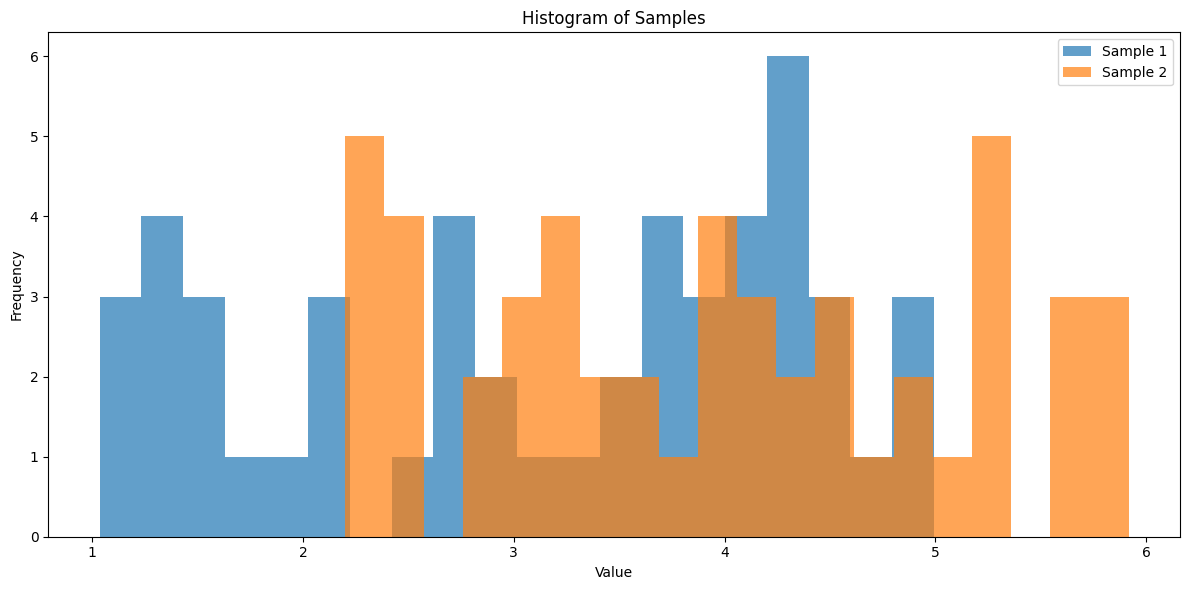

In [747]:
plt.figure(figsize=(12, 6))

plt.hist(sample1, bins=20, alpha=0.7, label='Sample 1')
plt.hist(sample2, bins=20, alpha=0.7, label='Sample 2')

plt.title('Histogram of Samples')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Вывод результатов теста

In [748]:
print(f"U-статистика: {U_statistic:.4f}")
print(f"p-значение: {p_value:.15f}")

U-статистика: 826.0000
p-значение: 0.003466992000679


Интерпретация результатов

In [749]:
alpha = 0.05
if p_value < alpha:
    print("Результат статистически значим: выборки имеют статистически значимые различия.")
else:
    print("Результат не является статистически значимым: нет доказательств статистически значимых различий между выборками.")

Результат статистически значим: выборки имеют статистически значимые различия.
